In [2]:
import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import random
import time
sns.set()

In [42]:
#importing our netflix viewing history csv
df1 = pd.read_csv("C:/Users/trive/Downloads/NetflixViewingHistory.csv")
df1['Title'] = df1['Title'].astype(str)
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%y', errors='coerce')
df1 = df1[df1['Date'].dt.year == 2023]
df1['show_title'] = [s.partition(':')[0] for s in df1['Title']]
my_titles = list(df1['show_title'])

In [43]:
df2 = pd.read_csv("C:/Users/trive/Downloads/archive (3)/netflix_titles.csv")
df = pd.merge(df1, df2, left_on='show_title', right_on='title', how='inner') #merged df
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df.drop_duplicates(subset='show_title') #cleaning movie dataset
shows_df = df[df['type'] == 'TV Show']

In [44]:
#top shows 
top_show = shows_df['show_title'].value_counts().head(5)
top_show

Friends              93
Peaky Blinders       36
One Day at a Time    22
Space Force          17
Ragnarok             16
Name: show_title, dtype: int64

In [45]:
#top rewatches
movies_dfx = df[df['type'] == 'Movie'] #need duplicates here so calling back original list
movies_count=movies_dfx['show_title'].value_counts().head(5)
top_rewatch = movies_count[movies_count >1].head(5)
if top_rewatch.empty == True:
    print("No movie rewatches this year!")
else:
    print(f"Your top rewatch is {top_rewatch.idxmax()} you watched it {top_rewatch.max()} times this year")

Your top rewatch is Unknown you watched it 2 times this year


C:\Users\trive\AppData\Local\Temp\ipykernel_22048\2088745439.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


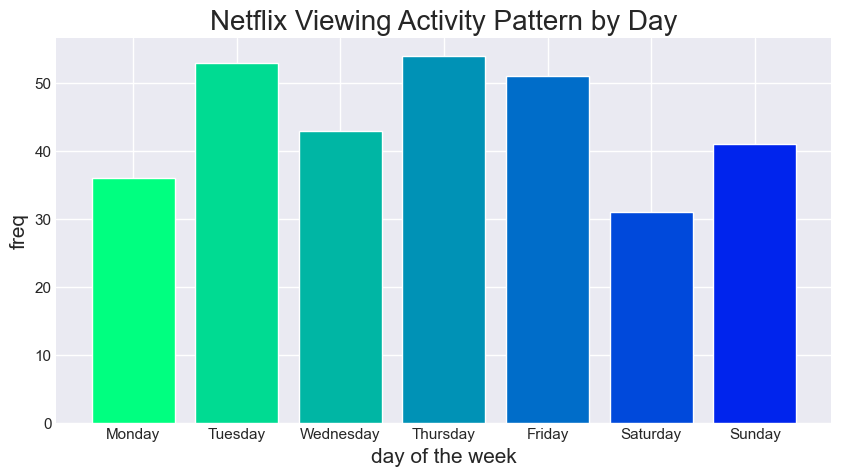

In [46]:
# Most watched Day of the week
from datetime import datetime
df['date'] = pd.to_datetime(df['Date'])
df['day'] = df['date'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=cats, ordered=True)
by_day = df.sort_values('day')['day'].value_counts().sort_index()
plt.style.use('seaborn-darkgrid')
N = len(by_day)
x = np.arange(N)
colors = plt.get_cmap('winter').reversed()
plt.figure(figsize=(10,5))
plt.bar(by_day.index, by_day.values, color=colors(x/N))
plt.title("Netflix Viewing Activity Pattern by Day", fontsize=20)
plt.xlabel("day of the week", fontsize=15)
plt.ylabel("freq", fontsize=15)
plt.savefig("freq by day.png", dpi=300, bbox_inches='tight')
plt.show()

In [47]:
#top directors
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df.drop_duplicates(subset='show_title')
director_counts = movies_df['director'].value_counts()
top_directors = director_counts[director_counts > 1].head(5)
if top_directors.empty == True:
    print("No favorite directors yet! Expand your inner cinephile")
else:
    top_directors

In [48]:
#top actors
dfx = df.drop_duplicates(subset='show_title')
actor_counts = dfx['cast'].str.split(', ', expand=True).stack().value_counts()
top_actors = actor_counts.head(5)
top_actors

Adam Sandler      4
Raghuvir Yadav    3
Sheeba Chaddha    3
Farhan Akhtar     3
Rishi Kapoor      3
dtype: int64

In [49]:
#you watched _ by your favorite actor
def any_actor_in_top(row):
     if isinstance(row['cast'], str):  # Check if cast is a string
        actors = row['cast'].split(', ')
        return any(actor in top_actors.head(1).index for actor in actors)
     return False  # Return False for non-string or NaN values

filtered_df = dfx[dfx.apply(any_actor_in_top, axis=1)]
filtered_df[['show_title','cast']]

show_title  \
243              You Don't Mess with the Zohan   
291  The Meyerowitz Stories (New and Selected)   
302                                The Week Of   
304                                  Grown Ups   

                                                  cast  
243  Adam Sandler, John Turturro, Emmanuelle Chriqu...  
291  Adam Sandler, Ben Stiller, Dustin Hoffman, Eli...  
302  Adam Sandler, Chris Rock, Steve Buscemi, Rache...  
304  Adam Sandler, Kevin James, Chris Rock, David S...

In [50]:
#top genres
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
top_genre = genre_counts[genre_counts >1].head(5)
watched_genre = genre_counts[genre_counts>1].head(10)
top_genre

TV Comedies               152
Classic & Cult TV         108
International TV Shows     76
British TV Shows           55
Dramas                     42
dtype: int64

In [51]:
#era
decades = range(1900, 2031, 10)
movies_df['decade'] = pd.cut(movies_df['release_year'], bins=decades, labels=decades[:-1])
decade_counts = movies_df['decade'].value_counts().sort_index()
top_decade = decade_counts.idxmax()
print(f"You are a {top_decade}s kid")
print(f"You watched {decade_counts.max()} movies from {top_decade}s")

You are a 2010s kid
You watched 37 movies from 2010s


In [52]:
#most watched day
Most_Watched_Day = df['Date'].value_counts().head(1).index[0]
filtered_df = df[df['Date'] == Most_Watched_Day]
episodes_watched = 0
movie_count=0
movies_watched = []
for index, row in filtered_df.iterrows():
    if row['type'] == 'TV Show':
        episodes_watched += 1
        if row['show_title'] not in movies_watched:
            movies_watched.append(row['show_title'])
    elif row['type'] == 'Movie':
        movie_count += 1
        if row['show_title'] not in movies_watched:
            movies_watched.append(row['show_title'])
if episodes_watched > 0:
    print(f"You watched {episodes_watched} episodes of {', '.join(movies_watched)} on {Most_Watched_Day}")
if movie_count> 0:
    print(f"You watched the following movies on {Most_Watched_Day}: {', '.join(movies_watched)}")

You watched 7 episodes of Friends on 2023-11-05 00:00:00


In [53]:
#highest rated movie on IMDb
imdb= pd.read_csv("C:/Users/trive/Downloads/archive (4)/tmdb_5000_movies.csv")
tmdb = pd.merge(df1, imdb, left_on='show_title', right_on='original_title', how='inner') #merged df
tmdb = tmdb.sort_values(by='vote_average', ascending=False)
top = tmdb.head(1).squeeze()
print(f"Highest rated movie watched {top['show_title']} with rating of {top['vote_average']} on IMDb")

Highest rated movie watched The Usual Suspects with rating of 8.1 on IMDb


In [54]:
#highest and lowest score on rotten tomatoes
Rotten_Tomatoes= pd.read_csv('C:/Users/trive/Downloads/archive (6)/rotten_tomatoes_movies.csv')
Rotten_Tomatoes.dropna(inplace=True)
final1 = pd.merge(df1, Rotten_Tomatoes, left_on='show_title', right_on='movie_title', how='inner') #merged df
final1 = final1.sort_values(by='audience_rating', ascending=False)
top_m = final1.head(1).squeeze()
low_m = final1.tail(1).squeeze()
print(f"Highest rated movie watched {top_m['show_title']} with score of {int(top_m['audience_rating'])}% on Rotten Tomatoes")
print(f"Lowest rated movie watched {low_m['show_title']} with score of {int(low_m['audience_rating'])}% on Rotten Tomatoes")

Highest rated movie watched The Usual Suspects with score of 96% on Rotten Tomatoes
Lowest rated movie watched The Circle with score of 21% on Rotten Tomatoes


In [55]:
#best and worst rated show
IMDB = pd.read_csv("C:/Users/trive/Downloads/19cbf7e3-29ab-409b-97e4-65e65f0b4a65.csv")
final2 = pd.merge(df1, IMDB, left_on='show_title', right_on='Title', how='inner') #merged df
final2 = final2.sort_values(by='IMDb Rating', ascending=False)
top_s = final2.head(1).squeeze()
low_s = final2.tail(1).squeeze()
print(f"Highest rated show watched {top_s['show_title']} with score of {(top_s['IMDb Rating'])} on IMDb")
print(f"Lowest rated show watched {low_s['show_title']} with score of {(low_s['IMDb Rating'])} on IMDb")

Highest rated show watched Peaky Blinders with score of 8.8 on IMDb
Lowest rated show watched Unbreakable Kimmy Schmidt with score of 7.6 on IMDb


In [56]:
academia= {"Alfred Hitchcock" : ['Psycho', 'Rear Window', 'Vertigo'],
"Stanley Kubrick": ['A Space Odyssey', 'The Shining', 'A Clockwork Orange'],
"Akira Kurosawa": ['Seven Samurai', 'Rashomon', 'Yojimbo'],
"Orson Welles":  ['Citizen Kane', 'Touch of Evil'],
"Martin Scorsese": ['Taxi Driver', 'Goodfellas', 'The Departed', 'The Irishman'],
"Steven Spielberg": ['Jaws', 'E.T.', 'Schindlers List', 'Saving Private Ryan'],
"Francis Ford Coppola": ['The Godfather' ,'Apocalypse Now'],
"Quentin Tarantino": ['Pulp Fiction', 'Kill Bill', 'Inglourious Basterds'],
"Christopher Nolan": ['The Dark Knight trilogy', 'Inception', 'Interstellar'],
"Wes Anderson": ['The Grand Budapest Hotel', 'Moonrise Kingdom', 'The Royal Tenenbaums'],
"Guillermo del Toro" : ['Pans Labyrinth', 'The Shape of Water', 'Pacific Rim'],
"Denis Villeneuve": ['Arrival', 'Blade Runner 2049', 'Dune'],
"Greta Gerwig": ['Lady Bird', 'Little Women'],"Jordan Peele": ['Get Out', 'Us'],
"Bong Joon-ho":['Parasite', 'Snowpiercer', 'Memories of Murder'],
"Chloé Zhao": ['Nomadland', 'The Rider']}
top_directors_list = top_directors.index.tolist()
directors_academia = {director: movies for director, movies in academia.items() if director in top_directors_list}
is_empty = not bool(directors_academia)
top_country = df['country'].value_counts().head(1).index[0]

In [57]:
#viewer mood
ratings = final1['content_rating'].value_counts()
if is_empty == False:
    print('Dark Academia - Intellectual intrigue and mystery')
elif ratings.idxmax() == 'PG-13' and top_decade == '2010':
    print('Teen Drama & Angst')
elif 'TV Comedies' and 'Classic & Cult TV' or 'Comedies' in top_genre.index and top_decade == '2000':
    print('90s & Y2K - Nostalgia revisited')
elif 'Action & Adventure' or 'TV Action & Adventure' in top_genre.index:
    print('Neighbourhood Bruce Lee - Action unleashed')
elif top_country == 'India':
    print('Bollywood - Extravaganza of dance and drama')
elif c or d < [a,b,e,f,g,h,i,j]:
    print('Comedy Buff: Laughter Enthusiast')
elif g or h < [a,b,c,d,e,f,i,j]:
    print('Sci-fi Nerd: Hitchhikers guide to galaxy enthusiast!')
elif i or j < [a,b,c,d,e,f,g,h]:
    print('Horror Fanatic: Fear is your Adrenaline')
else:
    print('Salt - Exploring the unexpected')

90s & Y2K - Nostalgia revisited


In [41]:
a,b= genre_counts.index.get_loc('TV Dramas'),genre_counts.index.get_loc('Dramas')
c,d = genre_counts.index.get_loc('TV Comedies'), genre_counts.index.get_loc('Comedies')
e,f = genre_counts.index.get_loc('Romantic TV Shows'), genre_counts.index.get_loc('Romantic Movies')
g, h = genre_counts.index.get_loc('TV Sci-Fi & Fantasy'), genre_counts.index.get_loc('Sci-Fi & Fantasy')
i, j = genre_counts.index.get_loc('TV Horror'), genre_counts.index.get_loc('Horror Movies')

In [58]:
#watchtime
def duration_to_minutes(row):
    duration = row['duration']
    if 'TV Show' in row['type']:
        if 'TV Comedies' in row['listed_in']:
            return 25
        elif 'Dramas' in row['listed_in']:
            return 45
        else:
            return 50
    elif 'Movie' in row['type']:
        if '-' in duration:
            min_range = duration.replace(' min', '').split('-')
            return (int(min_range[0]) + int(min_range[1])) // 2 
        return int(duration.split()[0])
    
df['duration_minutes'] = df.apply(duration_to_minutes, axis=1)
total_time_spent1 = df['duration_minutes'].sum()
total_time_spent2 = total_time_spent1/(60*24)
print(f'Total watch time: {total_time_spent1} minutes')
print(f'That is {total_time_spent2.round(2)} days')
if total_time_spent1 > 22676.5:
    more = (total_time_spent1/22676.5)*100
print(f'That is {more.round(2)}% more than the average watch time of a Netflix user in India')

Total watch time: 15945 minutes
That is 11.07 days
That is 136.47% more than the average watch time of a Netflix user in India
